In [12]:
!pip install -q scikit-learn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(sklearn.__version__)

1.5.1


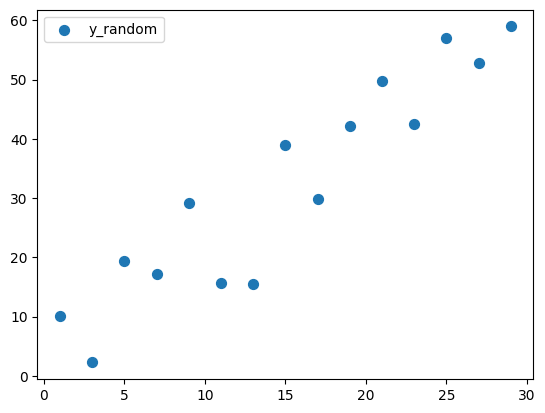

In [14]:
## 회귀분석
np.random.seed(910)
x = np.arange(1,30,2)
y = 2*x + 1  #coeff = 2, intercept(절편) = 1
y_random = y + np.random.normal(0, 8, len(y))  # 8 : 노이즈

#plt.scatter(x,y, s = 50, label = "y")
plt.scatter(x,y_random, s = 50,label = "y_random")
plt.legend()

plt.show()

In [15]:
## OLS : 최소제곱 추정량

x_mean= np.mean(x)
y_mean = np.mean(y_random)

Sxy = sum((x - x_mean) * (y_random - y_mean))
Sxx = sum((x - x_mean) ** 2)

b1 = Sxy / Sxx
b0 = y_mean - b1 * x_mean

print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))

b1 =  1.901
b0 =  3.566


y_random =  [10.1  2.3 19.4 17.1 29.2 15.6 15.5 38.9 29.9 42.2 49.7 42.4 57.  52.9
 59. ]
yhat =  [ 22.7   7.9  40.4  36.1  59.1  33.2  33.1  77.6  60.4  83.7  98.1  84.2
 111.9 104.  115.7]


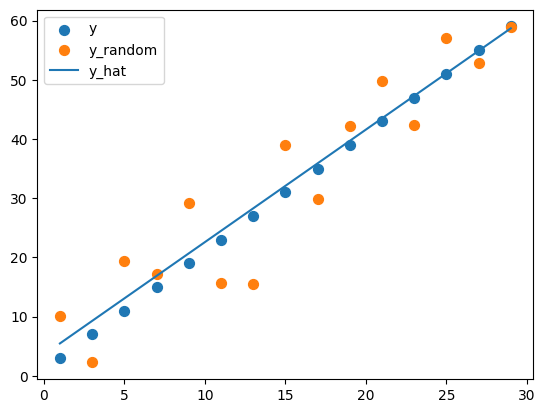

In [16]:
print("y_random = ",y_random.round(1))
print("yhat = ",(b1 * y_random + b0).round(1))

yhat = b1 * x + b0

# np.random.seed(910)
# x = np.arange(1,30,2)
# y = 2*x + 1  #coeff = 2, intercept(절편) = 1
# y_random = y + np.random.normal(0, 8, len(y))  # 8 : 노이즈

plt.scatter(x,y, s = 50, label = "y")
plt.scatter(x,y_random, s = 50,label = "y_random")
plt.plot(x,yhat,label = "y_hat")
plt.legend()

plt.show()

In [17]:
## 
from sklearn.linear_model import LinearRegression


In [18]:
x_2d = x.reshape(-1,1)
print(x)
print(x_2d)


[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]
 [27]
 [29]]


In [27]:
## class-intance

lr = LinearRegression()  #LinearRegression는 클래스


In [26]:
## fitting

lr.fit(x_2d, y_random)

LinearRegression()

In [21]:
## print

print("coeff = ", lr.coef_)
print("intercept = ", lr.intercept_)

coeff =  [1.90073609]
intercept =  3.566406385768893


In [22]:
## score /
lr.score(x_2d, y_random)

0.8679805034799591

In [28]:
import pandas as pd

# 엑셀 파일 읽기 (절대 경로 사용)
cars_df = pd.read_csv(r'C:\Users\user\Desktop\dataset_1\dataset\cars.csv')

# 데이터프레임 출력
print(cars_df)


    speed  dist
0       4     2
1       4    10
2       7     4
3       7    22
4       8    16
5       9    10
6      10    18
7      10    26
8      10    34
9      11    17
10     11    28
11     12    14
12     12    20
13     12    24
14     12    28
15     13    26
16     13    34
17     13    34
18     13    46
19     14    26
20     14    36
21     14    60
22     14    80
23     15    20
24     15    26
25     15    54
26     16    32
27     16    40
28     17    32
29     17    40
30     17    50
31     18    42
32     18    56
33     18    76
34     18    84
35     19    36
36     19    46
37     19    68
38     20    32
39     20    48
40     20    52
41     20    56
42     20    64
43     22    66
44     23    54
45     24    70
46     24    92
47     24    93
48     24   120
49     25    85


In [24]:
cars_df.describe()
print("summary statistic : ")
print(cars_df.agg(["mean","std","median","min","max"]).round(3))

summary statistic : 
         speed     dist
mean    15.400   42.980
std      5.288   25.769
median  15.000   36.000
min      4.000    2.000
max     25.000  120.000


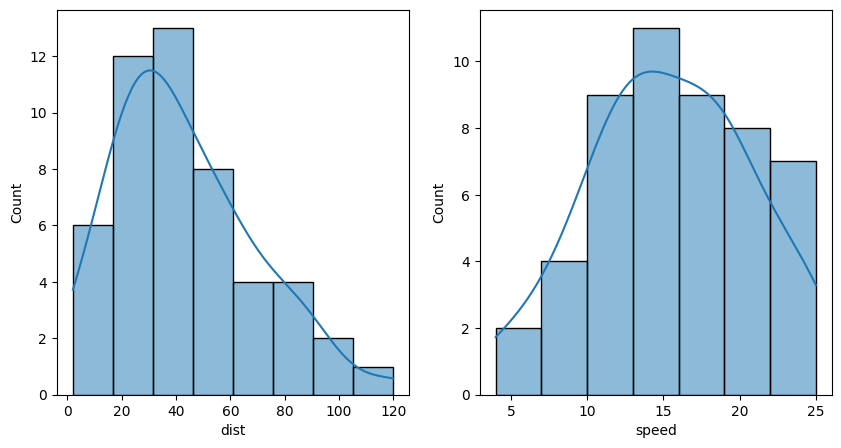

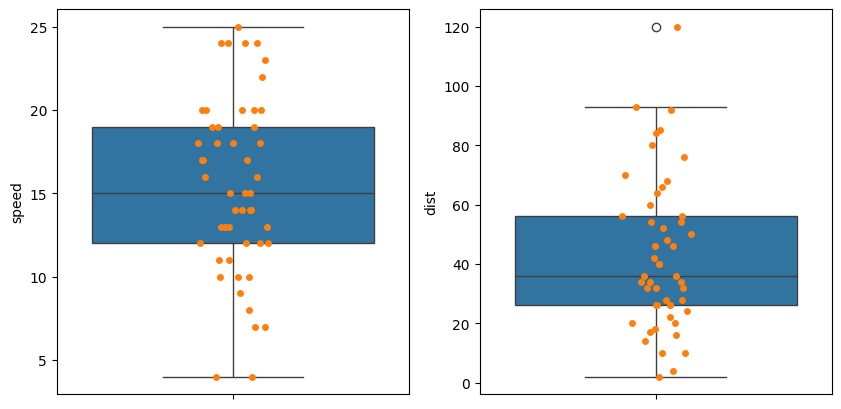

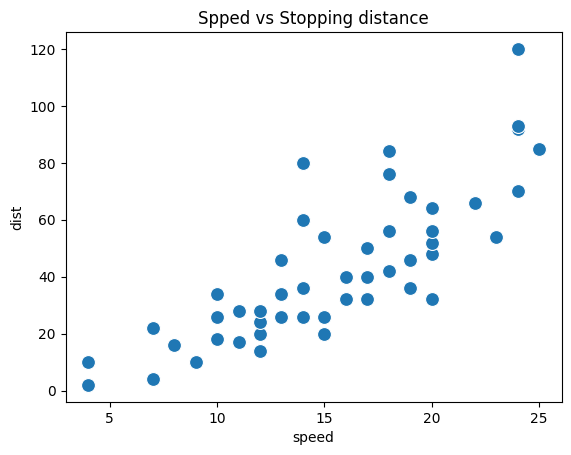

In [47]:
## Graph

fig, axs = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(cars_df, x = "dist", ax = axs[0], kde = True)
sns.histplot(cars_df, x = "speed", ax = axs[1], kde = True)
plt.show()

##
fig, axe = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(cars_df,y = "speed", ax = axe[0])
sns.stripplot(cars_df,y = "speed", ax = axe[0])

sns.boxplot(cars_df,y = "dist", ax = axe[1])
sns.stripplot(cars_df,y = "dist", ax = axe[1])
plt.show()

##
sns.scatterplot(cars_df, x = "speed", y = "dist", s = 100)
plt.title("Spped vs Stopping distance")
plt.show()

In [32]:
lr = LinearRegression()
lr.fit(cars_df[["speed"]],cars_df["dist"])

LinearRegression()

In [34]:
##
print("coeff = ", lr.coef_[0].round(3))
lr.fit(cars_df[["speed"]],cars_df["dist"])

coeff =  3.932


LinearRegression()

In [38]:
##
print("R-squared = ", round(lr.score(cars_df[["speed"]],cars_df[["dist"]]),3))

R-squared =  0.651


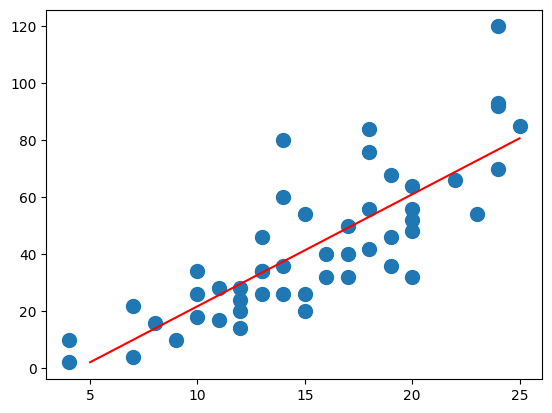

In [40]:
x_line = np.linspace(5,25,10)
plt.scatter(x = "speed", y = "dist", data = cars_df, s = 100)
plt.plot(x_line, 3.932*x_line - 17.579, c = "r")  #3.932 : 회귀계수 
plt.show()

In [49]:
## mpg
mtcars = pd.read_excel(r"C:\Users\user\Desktop\dataset_1\dataset\mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [63]:
mtcars_df = mtcars.loc[:, "cyl":"wt"]
mtcars_df.head()

,cyl,disp,hp,drat,wt
0,6,160.0,110,3.90,2.620
1,6,160.0,110,3.90,2.875
2,4,108.0,93,3.85,2.320
3,6,258.0,110,3.08,3.215
4,8,360.0,175,3.15,3.440


In [64]:
mtcars_df.describe()
print("summary statistic : ")
print(mtcars_df.agg(["mean","std","median","min","max"]).round(3))

summary statistic : 
          cyl     disp       hp   drat     wt
mean    6.188  230.722  146.688  3.597  3.217
std     1.786  123.939   68.563  0.535  0.978
median  6.000  196.300  123.000  3.695  3.325
min     4.000   71.100   52.000  2.760  1.513
max     8.000  472.000  335.000  4.930  5.424


<Axes: xlabel='hp', ylabel='Count'>

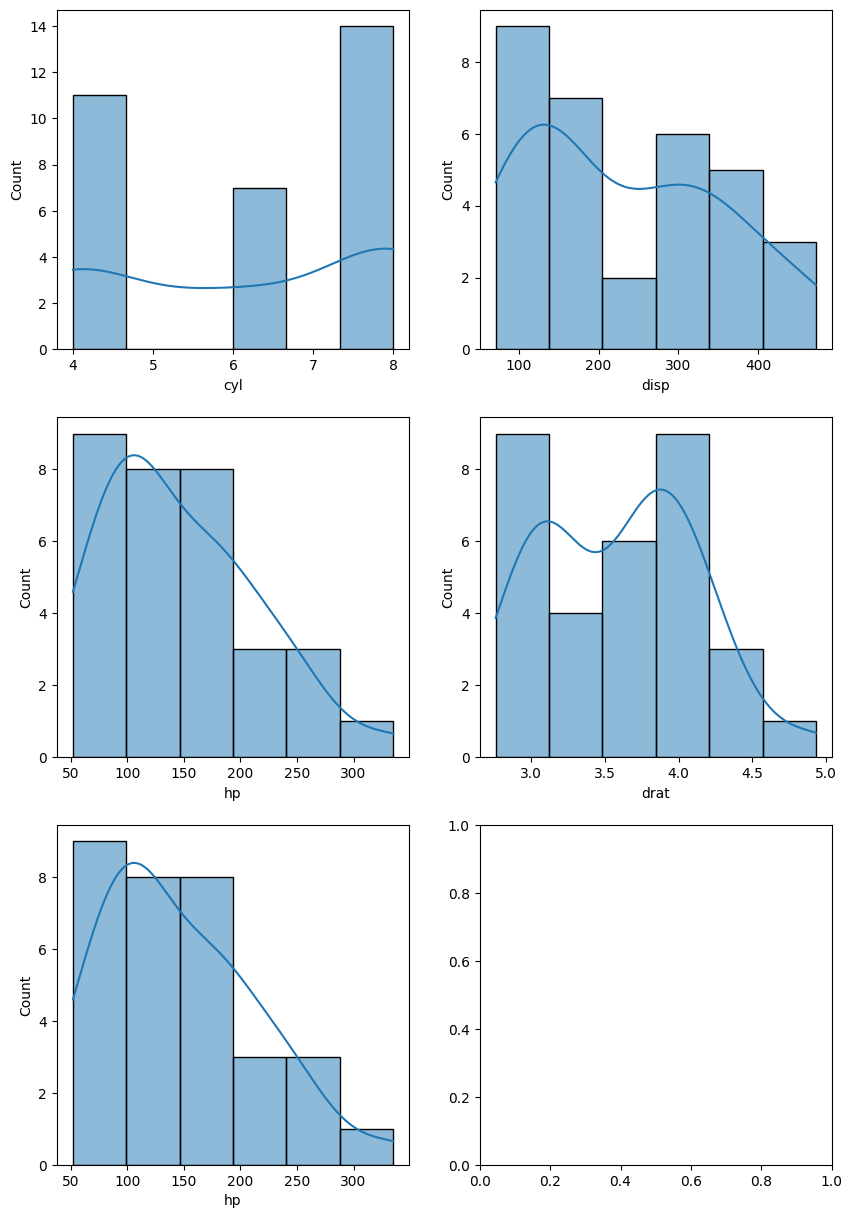

In [93]:
fig, axs = plt.subplots(3,2,figsize = (10,15))
sns.histplot(mtcars_df, x = "cyl", ax = axs[0,0], kde = True)
sns.histplot(mtcars_df, x = "disp", ax = axs[0,1], kde = True)
sns.histplot(mtcars_df, x = "hp", ax = axs[1,0], kde = True)
sns.histplot(mtcars_df, x = "drat", ax = axs[1,1], kde = True)
sns.histplot(mtcars_df, x = "hp", ax = axs[2,0], kde = True)

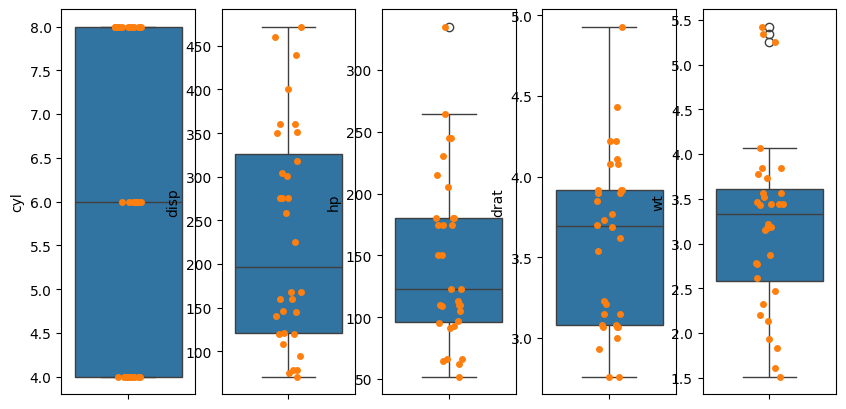

In [98]:
fig, axe = plt.subplots(1,5, figsize = (10,5))
for idx, elem in enumerate(mtcars_df):
    sns.boxplot(mtcars_df,y = elem, ax = axe[idx])
    sns.stripplot(mtcars_df,y = elem, ax = axe[idx])
plt.show()

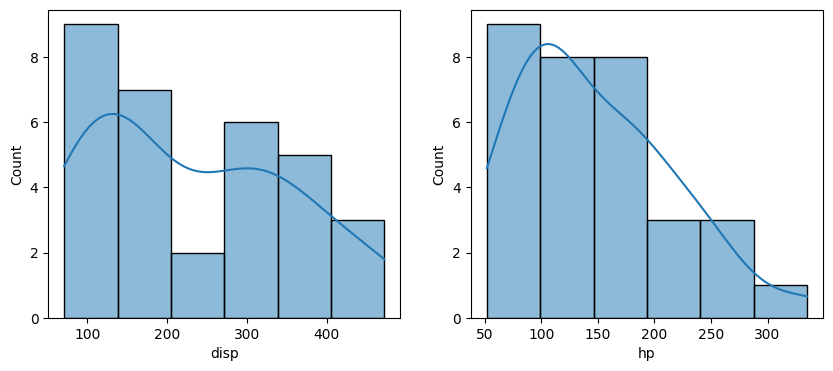

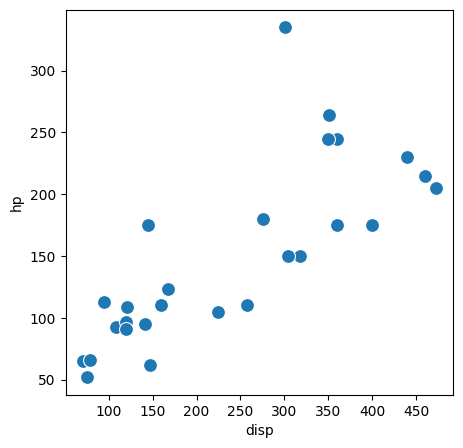

In [89]:
##
fig, axs = plt.subplots(1,2,figsize = (10,4))
sns.histplot(mtcars_df, x = "disp", ax = axs[0], kde = True)
sns.histplot(mtcars_df, x = "hp", ax = axs[1], kde = True)

fig, axe = plt.subplots(1,1,figsize = (5,5))
sns.scatterplot(mtcars_df, x = "disp", y = "hp", s = 100)
plt.show()

In [103]:
lr = LinearRegression()
lr.fit(mtcars_df[["disp"]],mtcars_df[["hp"]],mtcars_df[["cyl"]],mtcars_df[["drat"]],mtcars_df[["wt"]])

TypeError: LinearRegression.fit() takes from 3 to 4 positional arguments but 6 were given

In [83]:
print("coeff = ",lr.coef_[0].round(3))

print("R-squared =", round(lr.score(mtcars_df[["disp"]], mtcars_df["hp"]),3))

coeff =  [0.438]
R-squared = 0.626
